In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and Normalize the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
def create_model(n_filters=32, dropout_rate=0.25, dense_size=512):
    model = Sequential([
        Conv2D(n_filters, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(n_filters, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Conv2D(n_filters * 2, (3, 3), padding='same', activation='relu'),
        Conv2D(n_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),

        Flatten(),
        Dense(dense_size, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    return model


In [4]:
def compile_and_train(model, learning_rate=0.001, batch_size=64, epochs=15):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train_one_hot, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test_one_hot))
    return history

In [5]:
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

for dropout in dropout_rates:
    print(f"\nTraining with dropout rate of {dropout}.")
    model = create_model(dropout_rate=dropout)
    history = compile_and_train(model)
    accuracies.append(history.history['val_accuracy'][-1])  # Collect the last validation accuracy


Training with dropout rate of 0.1.
Epoch 1/15
782/782 [==============================] - 206s 261ms/step - loss: 1.4735 - accuracy: 0.4654 - val_loss: 1.1591 - val_accuracy: 0.5827
Epoch 2/15
782/782 [==============================] - 194s 249ms/step - loss: 1.0121 - accuracy: 0.6430 - val_loss: 0.8773 - val_accuracy: 0.6932
Epoch 3/15
782/782 [==============================] - 201s 257ms/step - loss: 0.8055 - accuracy: 0.7170 - val_loss: 0.7780 - val_accuracy: 0.7365
Epoch 4/15
782/782 [==============================] - 195s 250ms/step - loss: 0.6711 - accuracy: 0.7646 - val_loss: 0.7473 - val_accuracy: 0.7398
Epoch 5/15
782/782 [==============================] - 195s 249ms/step - loss: 0.5685 - accuracy: 0.7991 - val_loss: 0.6818 - val_accuracy: 0.7634
Epoch 6/15
782/782 [==============================] - 194s 249ms/step - loss: 0.4819 - accuracy: 0.8309 - val_loss: 0.7100 - val_accuracy: 0.7601
Epoch 7/15
782/782 [==============================] - 196s 251ms/step - loss: 0.3977 - a

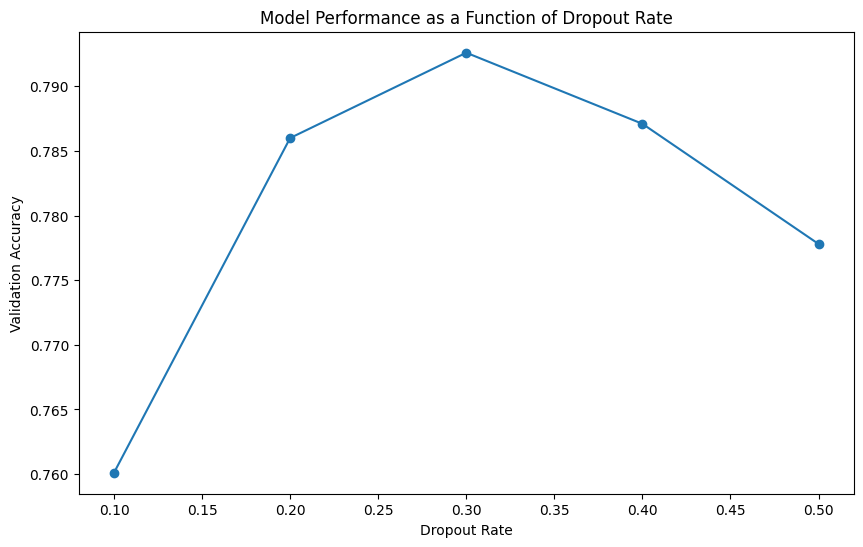

In [6]:
# Cell 6: Plot the Performance as a Function of Dropout Rate
plt.figure(figsize=(10, 6))
plt.plot(dropout_rates, accuracies, marker='o', linestyle='-')
plt.title('Model Performance as a Function of Dropout Rate')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation Accuracy')
plt.show()
